# Analyzing Heavy Traffic Indicators on the I-94 Interstate

The goal of this analysis is to determine if there are any potential indicators of heavy traffic on the I-94 Interstate. These indicators may include weather type, time of day, time of the week, etc.

The dataset for this project is from 2012 - 2018, which was made available by John Hogue, and it be can downloaded from the UCI Machine Learning Repository: 'https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume'


### Summary
- The results revealed that westbound traffic on the I-94 was most congested on weekdays during the times of 6am-7am and 3pm-4pm. These two time frames can be classified as 'rush hour' since they are likely correlated with people going to and from work on weekdays.  <br>
- The traffic volume occasionally exceed 6000 cars during rush hours.<br>
- Traffic is at its highs during warm months (March–October) and drops off by ~11% during cold months (November–February).<br>
- Traffic at night is roughly 33-50% of total traffic volume during the daytime. <br>
- Weather conditions don't materially impact wether or not a driver will drive any given day.
- Temperature does not have strong correlation with traffic volume. 


### Data Dictionary:

The dataset has `9` columns:

- `holiday:` categorical data that refers to US National holidays plus regional holiday, Minnesota State Fair
- `rain_1h:` numerical data which is the amount in mm of rain that occurred in the hour
- `snow_1h:` numerical data which is the amount in mm of snow that occurred in the hour
- `clouds_all:` numerical data which is the percentage of cloud cover
- `weather_main:` categorical short textual data that describes the current weather
- `weather_description:` categorical long textual data that describes the current weather
- `date_time:` DateTime Hour of the data collected in local CST time
- `traffic_volume:` numerical hourly I-94 ATR 301 reported westbound traffic volume


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
traffic.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


In [5]:
traffic.tail(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947
48199,None,283.45,0.00,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.00,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
traffic.isnull().any()

holiday                False
temp                   False
rain_1h                False
snow_1h                False
clouds_all             False
weather_main           False
weather_description    False
date_time              False
traffic_volume         False
dtype: bool

We begin by analyzing our dataset. The dataset contains `48204` total rows with `9` columns. Each row describes traffic and weather data for a specific hour. We have data from `2012-10-02 09:00:00` until `2018-09-30 15:00:00`. We also note that our data does not contain any null values. 

## Analyzing Traffic Volumes

We begin our analysis by examining the distribution of the `traffic_volume` column.

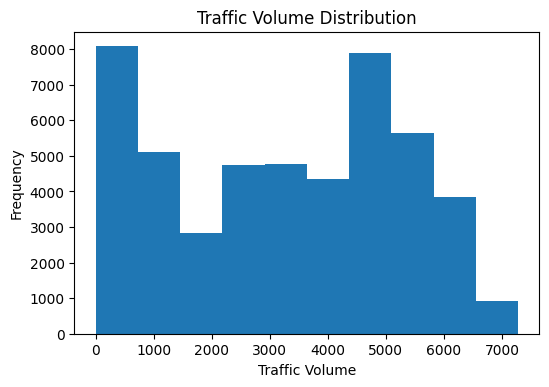

In [8]:
plt.hist(traffic['traffic_volume'])
plt.title('Traffic Volume Distribution')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.show()

In [9]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The average amount of cars that travel past the station per day is `3,259`. It can be observed that about `25%` of the time, there were fewer than `1193` cars passing the station each hour, this likely only occurs at deep hours of the night or when a road is under construction. We will investigate further.

## Traffic Volume: Day vs Night

We will start by dividing the dataset into two parts:
- `Daytime Data:` hours from 7am to 7pm (12 hours) 
- `Nighttime Data:` hours from 7pm to 7am (12 hours)

This may not be a perfect criterion for distinguishing between daytime and nighttime, but it is a good starting point.

In [10]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [11]:
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

(23877, 9)


In [12]:
night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(24327, 9)


In [13]:
traffic[172:201]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
172,None,282.45,0.0,0.0,90,Clouds,overcast clouds,2012-10-09 23:00:00,947
173,None,281.88,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 00:00:00,494
174,None,281.78,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 01:00:00,332
175,None,281.09,0.0,0.0,75,Clouds,broken clouds,2012-10-10 02:00:00,261
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875
178,None,281.25,0.0,0.0,99,Rain,light rain,2012-10-10 07:00:00,6793
179,None,281.25,0.0,0.0,99,Drizzle,light intensity drizzle,2012-10-10 07:00:00,6793
180,None,280.10,0.0,0.0,99,Rain,light rain,2012-10-10 08:00:00,6283
181,None,280.10,0.0,0.0,99,Drizzle,light intensity drizzle,2012-10-10 08:00:00,6283


There is a notable difference in sample amounts between day and night (~450 more night time data points). When we check rows `172` through `200`, we find that there are hours which are not captured during both daytime and nighttime. We can assume that there is no real bais in our data caused by this random data collection error. We continue on with our analysis. 

## Traffic Volume: Day vs Night Continued

Now that we've isolated our dataset by day and night, we can begin to generate histograms of traffic volume of day and night side-by-side through the use of a grid chart.

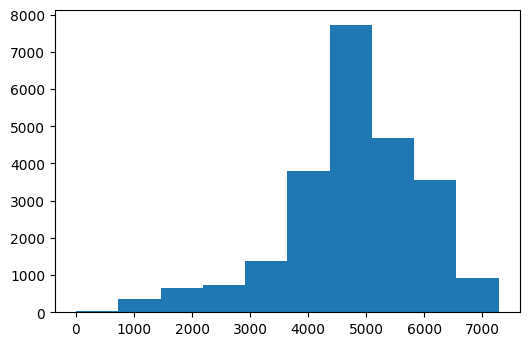

In [14]:
plt.hist(day['traffic_volume'])
plt.show()

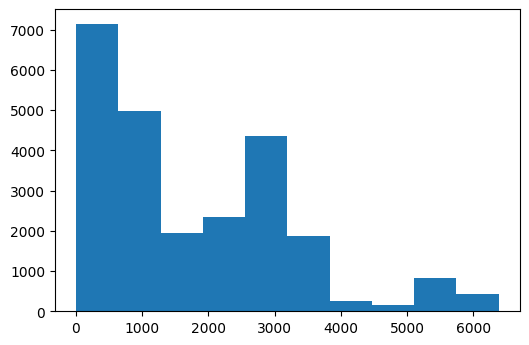

In [15]:
plt.hist(night['traffic_volume'])
plt.show()

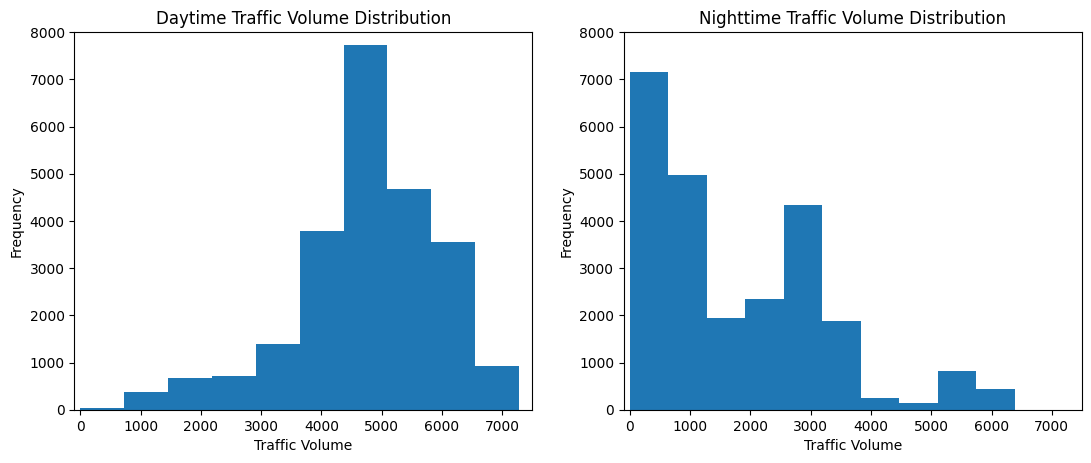

In [16]:
plt.figure(figsize = (13,5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Daytime Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Nighttime Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()


In [17]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [18]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The following can be observed about daytime data:
- The distribution of traffic volume during the day is left skewed which means most of the daytime samples reflect high individual traffic volumes. 
- We can see that `25%` of the time there are `4,252` cars traveling on average during the daytime.
- On average there are `4,762` cars traveling westward on the I-94 during the daytime hours of 7am-7pm.
- We find that daytime traffic represents more than 75% of total traffic.

The following can be observed about nighttime data:
- The distribution of traffic volume during the night is right skewed which means most of the nighttime samples reflect low individual traffic volumes.
- We can see that `25%` of the time there are `530` cars traveling on average during the nighttime.
- On average there are `1,785` cars traveling westward on the I-94 during the nighttime hours of 7pm-7-am.
- We find that nighttime traffic represents less then 25% of total traffic.

Since our goal is to find indicators of heavy traffic, we will focus on daytime data going forward since it represents the greatest share of where traffic is forming.

## Time Indicators

Time is one of the possible indicators of heavy traffic. 

We will create line plots below in order to explore how traffic volumes change according to the following parameters:
- Month
- Day of the Week
- Time of the Day


## Traffic Volume Vs. Month

In [19]:
day['month'] = day['date_time'].dt.month
monthly = day.groupby('month').mean()
monthly['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

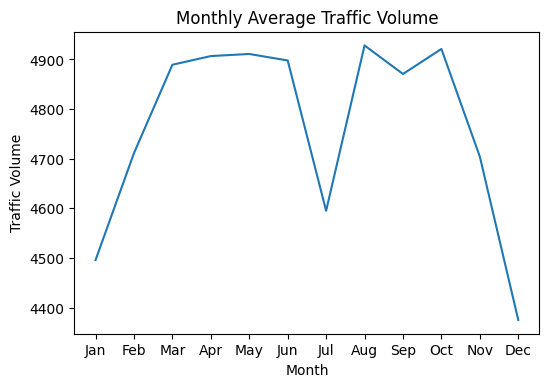

In [20]:
plt.plot(monthly['traffic_volume'])
plt.title('Monthly Average Traffic Volume')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])



plt.show()

The above graph shows that traffic volume is heaviest during the warm months of March through October. Traffic volume then wains down during the colder months of November through February. July sticks out as an anomoly worth fruther exploring considering there is a dip in traffic volume despite it being warm in July. The dip might be due to coinsiding school and work summer vacation time which may lead to less road travel on average. We will take a closer look at July.

## Traffic Volume Vs. Year (July Deepdive)

In [21]:
day['year'] = day['date_time'].dt.year
july_traffic = day[day['month'] == 7]
july_traffic = day.groupby('year').mean()

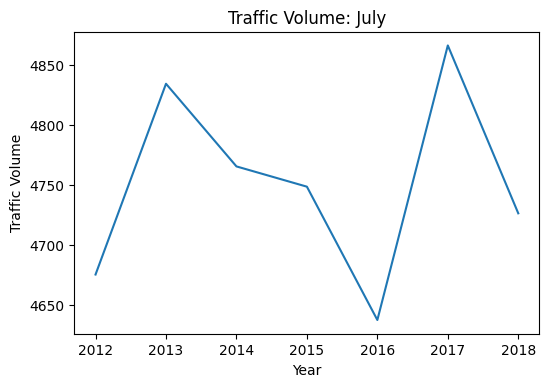

In [22]:
plt.plot(july_traffic['traffic_volume'])
plt.title('Traffic Volume: July')
plt.ylabel('Traffic Volume')
plt.xlabel('Year')
plt.show()

In [23]:
july_traffic['traffic_volume']

year
2012    4675.346861
2013    4834.084298
2014    4765.309296
2015    4748.448485
2016    4637.518293
2017    4865.961752
2018    4726.280534
Name: traffic_volume, dtype: float64

We find that traffic volumes are still relatively high in July. The dip in 2016 can be associated with road construction which limited traffic during the period. Overall, we find that on average, about 4,950 cars travel westward on the I-94 during the daytime on warm months. 

## Traffic Volumes Vs. Day of the Week

In [24]:
day['dayofweek'] = day['date_time'].dt.dayofweek
daily = day.groupby('dayofweek').mean()
daily['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

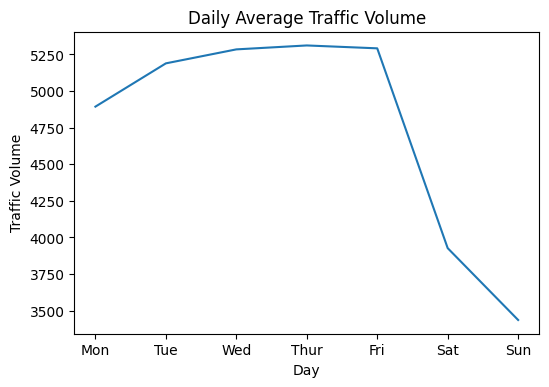

In [25]:
plt.plot(daily['traffic_volume'])
plt.title('Daily Average Traffic Volume')
plt.xlabel('Day')
plt.ylabel('Traffic Volume')
plt.xticks(ticks = [0,1,2,3,4,5,6],labels = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.show()

We find that heavy traffic volumes tend to take place during the weekday as opposed to the weekend.

### Traffic Volume Vs. Daytime (Weekdays and Weekends)

Let us further explore the data to see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look at the averages separately.

In [26]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]
hourly_business = business_days.groupby('hour').mean()
hourly_weekend = weekend.groupby('hour').mean()

In [27]:
hourly_business['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [28]:
hourly_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

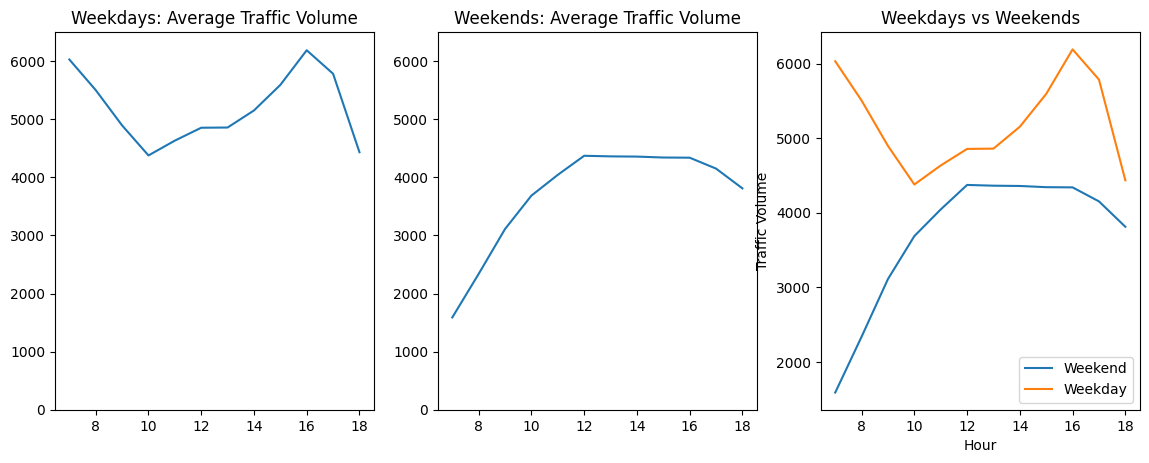

In [29]:
plt.figure(figsize = (14,5))

plt.subplot(1,3,1)
plt.plot(hourly_business['traffic_volume'])
plt.title('Weekdays: Average Traffic Volume')
plt.ylim(0,6500)

plt.subplot(1,3,2)
plt.plot(hourly_weekend['traffic_volume'])
plt.title('Weekends: Average Traffic Volume')
plt.ylim(0,6500)


plt.subplot(1,3,3)
plt.plot(hourly_weekend['traffic_volume'])
plt.plot(hourly_business['traffic_volume'])
plt.title('Weekdays vs Weekends')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.legend(['Weekend','Weekday'])
plt.show()

We find that traffic volume tends to be higher every hour when compared to weekend traffic. Another way to interpret this is by saying that even the lowest traffic volumes of the weekday are still higher then the highest traffic volumes of the weekend. Rush hours recorded volumes of over 6,000 cars per hour.

## Weather Indicators

From the dataset, we have another possible indicator of heavy traffic which is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

To start with, let's begin by looking up their correlation values with `traffic_volume`.

In [30]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

`temp` has the highest correlation of all the weather columns with a value of +0.13. All other weather columns don't show any signs of a strong correlation to traffic volume.

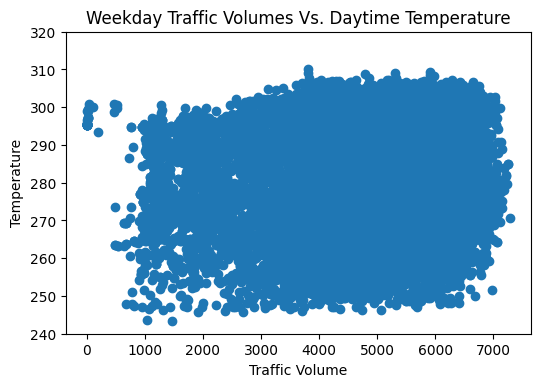

In [31]:
plt.scatter(day['traffic_volume'],day['temp'])
plt.title('Weekday Traffic Volumes Vs. Daytime Temperature')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.ylim(240,320)
plt.show()

Although temp had the highest correlation to traffic volume in comparison to all other weather columns (+0.13), generally a correlation factor of .13 is not strong enough. The scatter plot above reflects this. The stronger the correlation, the more predictable the connection between two variables. In this case, temperature is not a factor that is highly related to traffic volume. Next, lets have a look at weather types in order to determine if they yield a certain effect on traffic volumes.

## Considering Weather Types

We continue our analysis by taking a closer look at the impact that weather type and subtypes have on traffic volume.

First we analyze main weather types and their impacts on traffic volumes.

In [33]:
weather_type = day.groupby('weather_main').mean()
weather_desc = day.groupby('weather_description').mean()

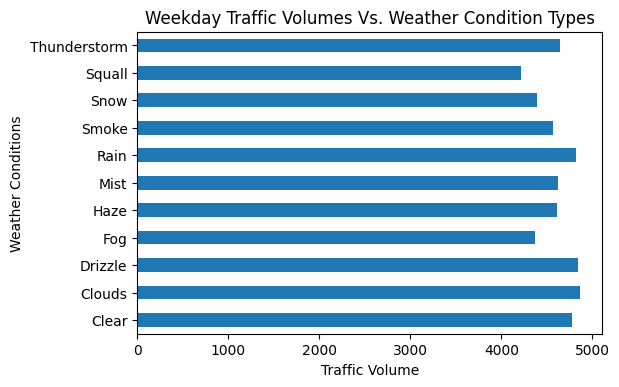

In [34]:
weather_type['traffic_volume'].plot.barh()
plt.title('Weekday Traffic Volumes Vs. Weather Condition Types')
plt.ylabel('Weather Conditions')
plt.xlabel('Traffic Volume')
plt.show()

Both squall and fog tend to produce the least traffic volumes of all weather types, the difference in traffic volumes is mostly immaterial though with a difference from the highs during cloud weather of ~400 cars per hour. We will now look at weather subtypes in order dive a bit deeper.

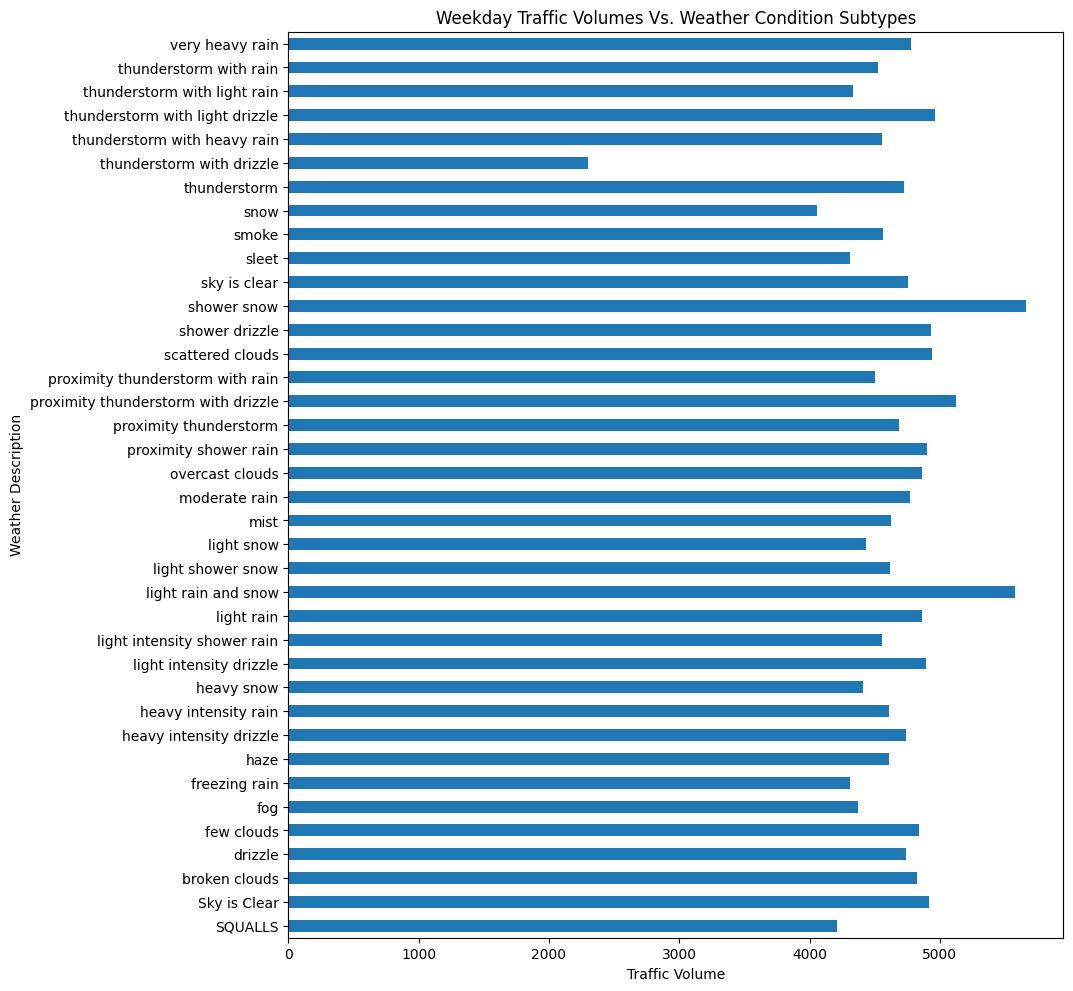

In [35]:
weather_desc['traffic_volume'].plot.barh(figsize=(10,12))
plt.ylabel('Weather Description')
plt.xlabel('Traffic Volume')
plt.title('Weekday Traffic Volumes Vs. Weather Condition Subtypes')


plt.show()

In [40]:
weather_desc['traffic_volume'].sort_values(ascending=False).head(10)

weather_description
shower snow                            5664.000000
light rain and snow                    5579.750000
proximity thunderstorm with drizzle    5121.833333
thunderstorm with light drizzle        4960.000000
scattered clouds                       4936.787712
shower drizzle                         4932.666667
Sky is Clear                           4919.009390
proximity shower rain                  4901.756757
light intensity drizzle                4890.164049
overcast clouds                        4861.124952
Name: traffic_volume, dtype: float64

We find that only three weather subtypes produce traffic volumes that exceed 5,000 cars per hour and they are:
- Shower Snow
- Light Rain and Snow
- Proximity Thunderstorm and Drizzle

The three weather types are indicators of mild bad weather, perhaps more people tend to use a car during inclement weather as opposed to walking or biking to their destinations. 

## Conclusion

The objective of this project is to find possible indicators of heavy traffic on the I-94 interstate highway. The results of the analysis shows that daytime indicators are more significant than nighttime and weather indicators. The analysis revealed the following as some of the major indicators for heavy traffic.

- Traffic is usually  heavier during the warm months of March through October and less heavy in the cold months of November through February
-  Generally, the traffic volume is usually higher during weekdays. 
- Rush hours for heavy traffic are on weekdays from 6am-7am and 3pm-4pm with traffic volumes exceding over 6,000 cars.
- Shower snow, light rain and snow and proximity thunderstorm with drizzle tend to create more traffic volume in comparison to other weather types.
- I did not find any strong correlations of traffic volume to either weather type or temperature.
